## Introduction

First, let’s create explainers for random forest model and linear model

In [2]:
library("DALEX")
library("randomForest")
library("ceterisParibus")
set.seed(59)

apartments_lm_model <- lm(m2.price ~ construction.year + surface + floor + 
                            no.rooms + district, data = apartments)

apartments_rf_model <- randomForest(m2.price ~ construction.year + surface + floor + 
                                      no.rooms + district, data = apartments)

explainer_rf <- explain(apartments_rf_model, 
                        data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)
explainer_lm <- explain(apartments_lm_model, 
                        data = apartmentsTest[,2:6], y = apartmentsTest$m2.price)

## Local Fit Explanations

Local Fit Plots are something between Ceteris Paribus Plots (profile for single observation), ICEPlots (all profiles) and diagnostic plots.

Local Fit Plots show profiles for observations close to a selected point in feature space. Additionally they show also residuals for these neighbours. This way one can read how good the black box model is fitted around specific point.

Let’s see an example. We will explain prediction for first observation.

In [3]:
new_apartment <- apartmentsTest[1, ]
new_apartment

,m2.price,construction.year,surface,floor,no.rooms,district
1001,4644,1976,131,3,5,Srodmiescie


The validation data has 9000 observations. We will use 0.2 percents (18 observations) to see local fit for selected observation. As you see below residuals for neighbouring observations are quite large. Locally the fit is pretty bad.

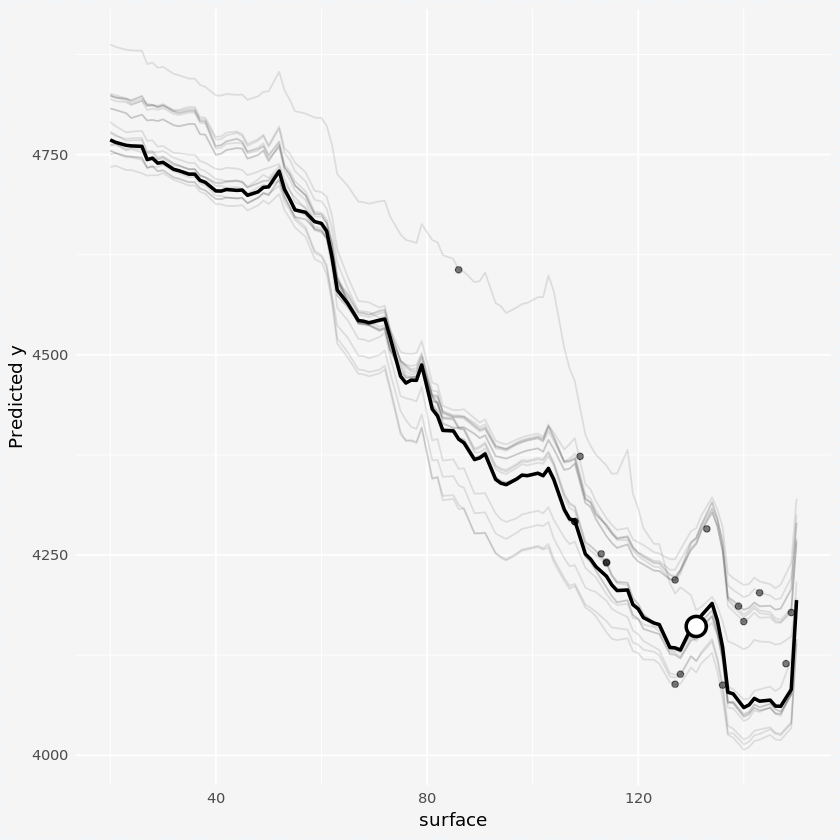

In [4]:
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf, plot_residuals = FALSE)

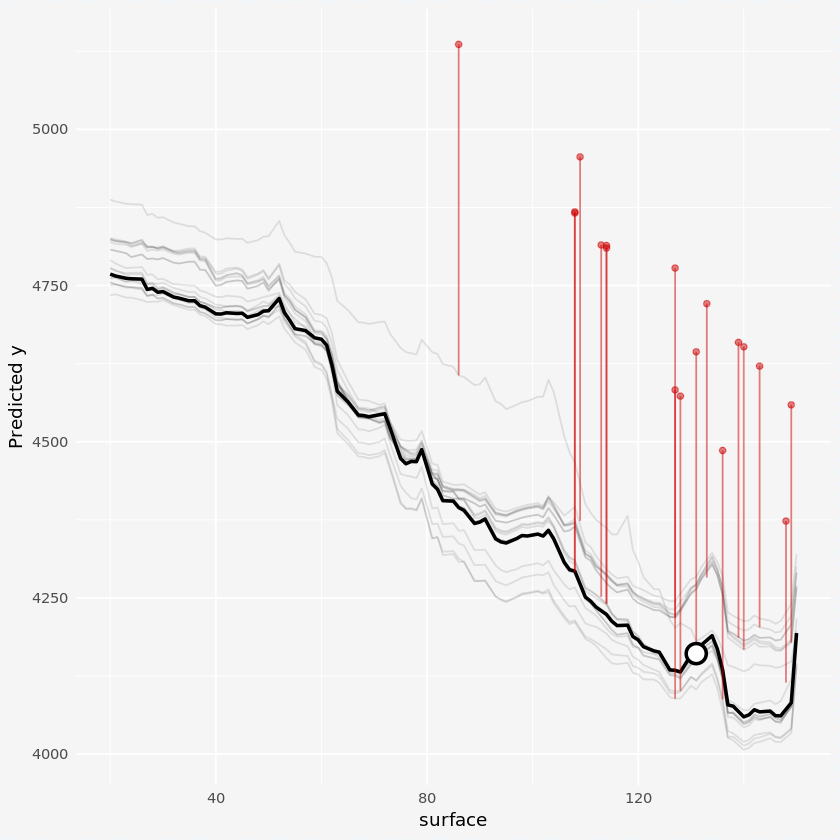

In [5]:
plot(cr_rf)

How it looks for other points? Better, just see, now residuals are more or less symmetric.

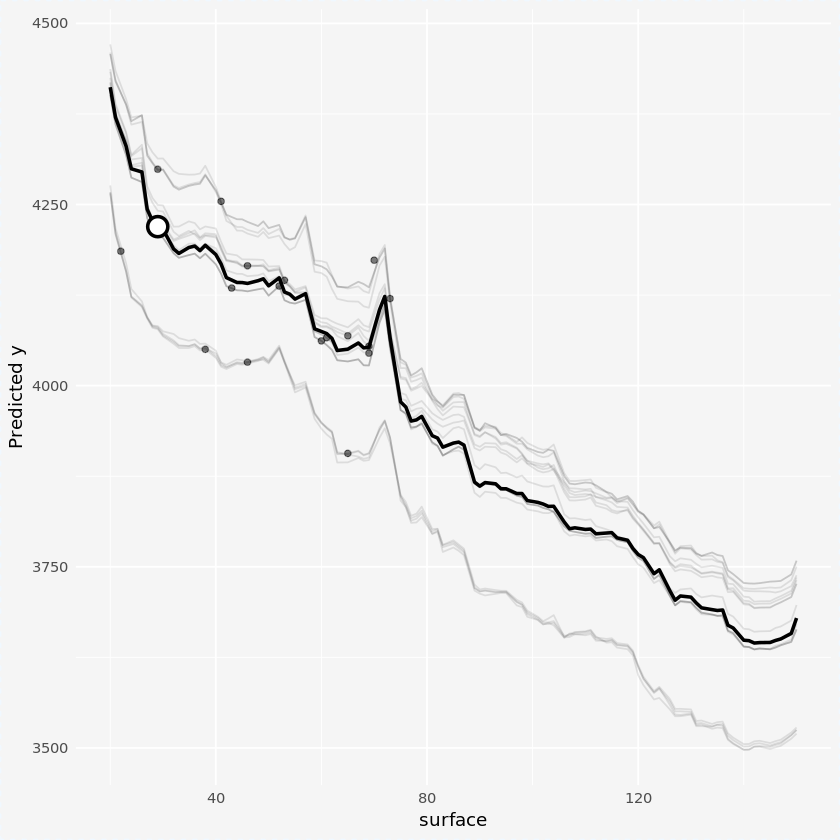

In [6]:
new_apartment <- apartmentsTest[10, ]
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf, plot_residuals = FALSE)

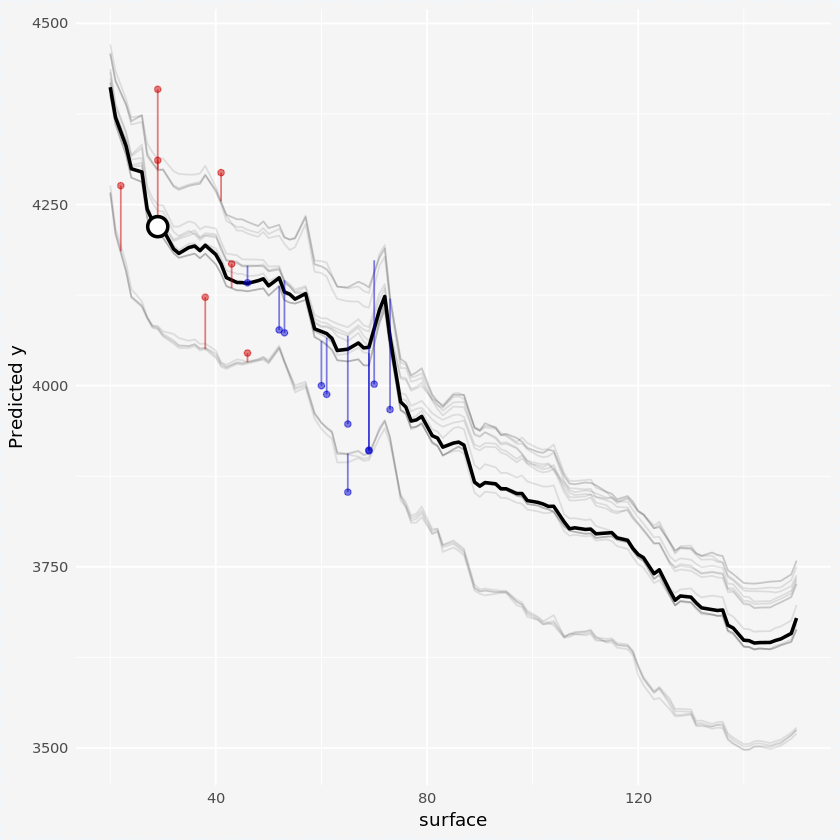

In [7]:
plot(cr_rf)

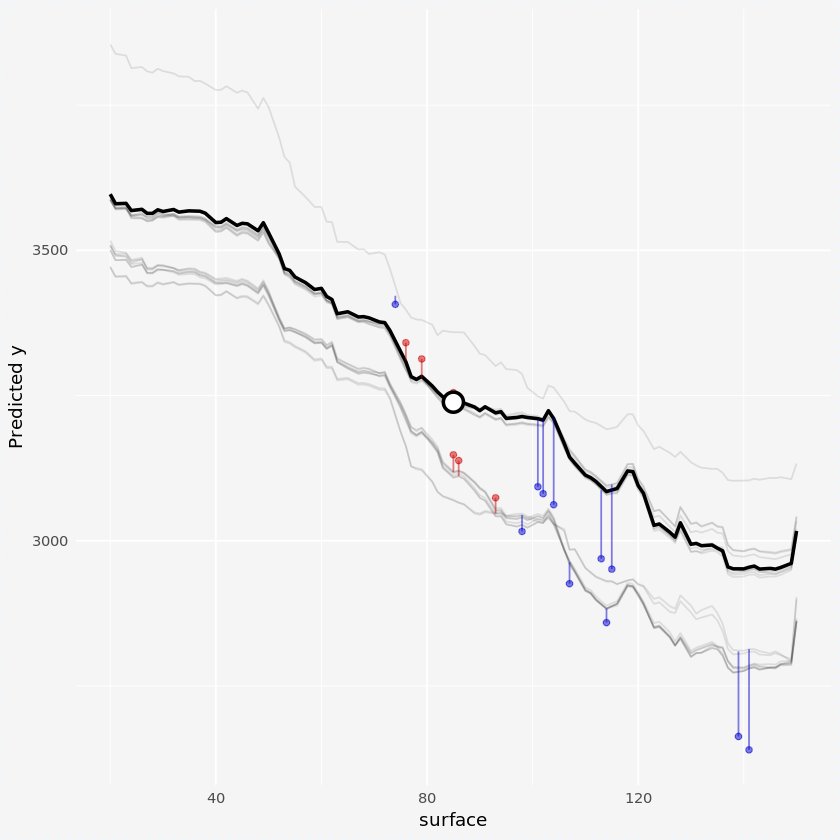

In [8]:
new_apartment <- apartmentsTest[302, ]
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
 plot(cr_rf)

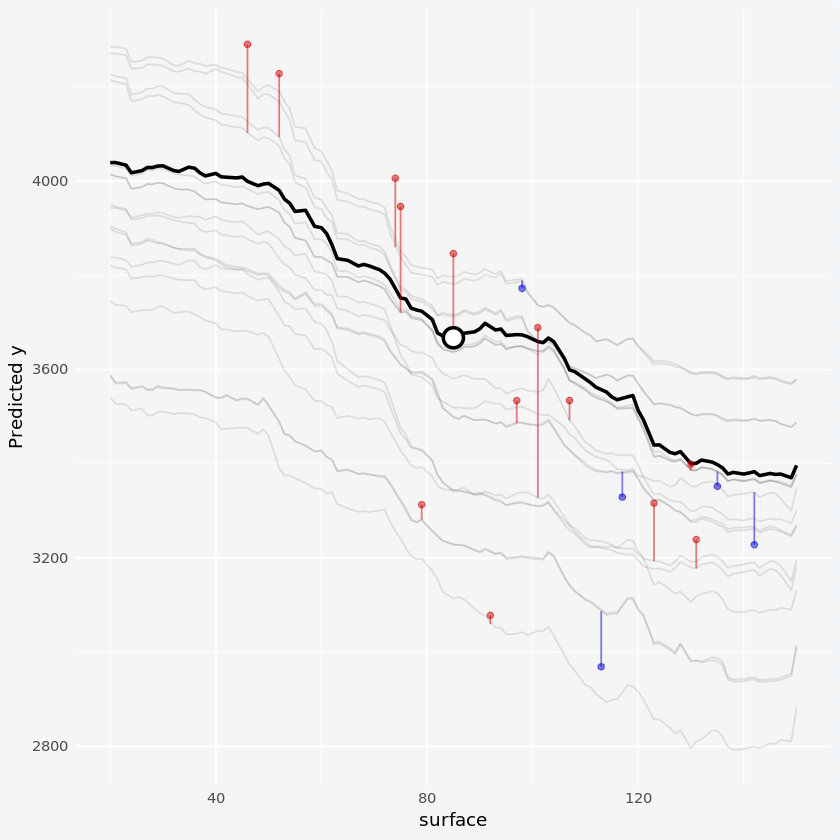

In [9]:
new_apartment <- apartmentsTest[720, ]
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf)

## Wangkardu Explanations

Wangkardu Explanations are Local Fit Plots with changed color palette. Here colors are taken from Wangkardu paintings by Helicopter Tjungurrayi https://www.artgallery.nsw.gov.au/collection/works/4.2003/

Let’s see some examples.

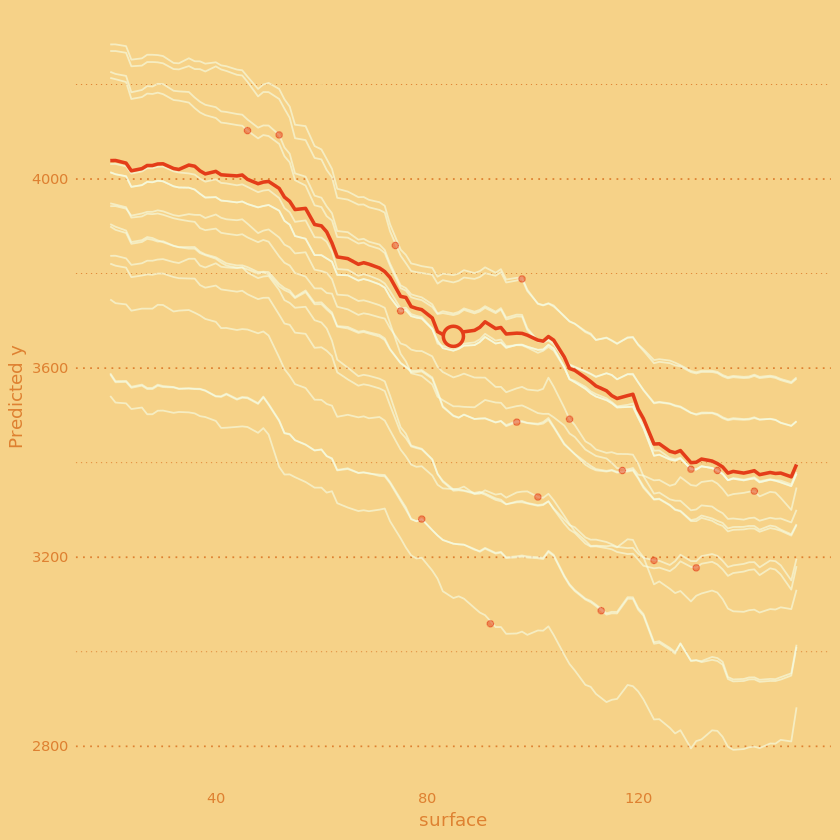

In [11]:
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf, plot_residuals = FALSE, palette = "wangkardu")

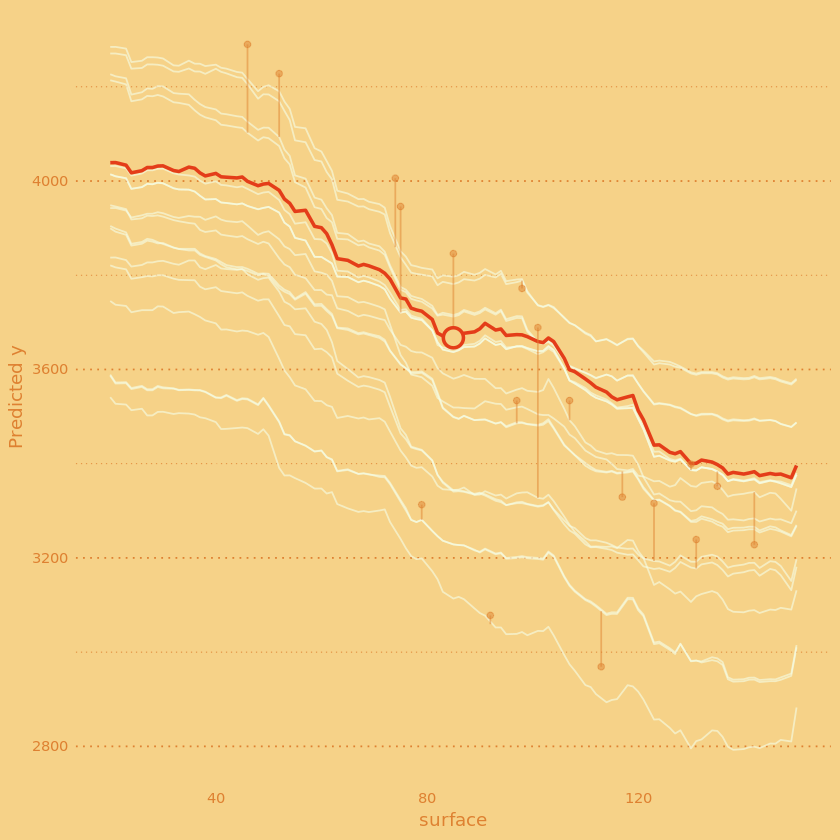

In [12]:
plot(cr_rf, palette = "wangkardu")

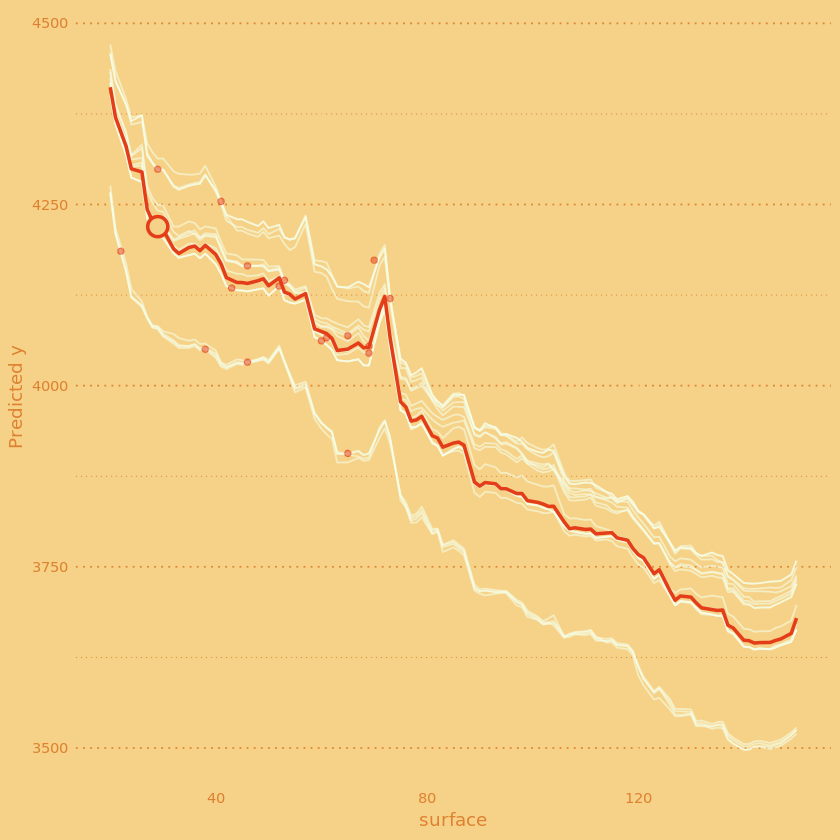

In [13]:
new_apartment <- apartmentsTest[10, ]
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf, plot_residuals = FALSE, palette = "wangkardu")

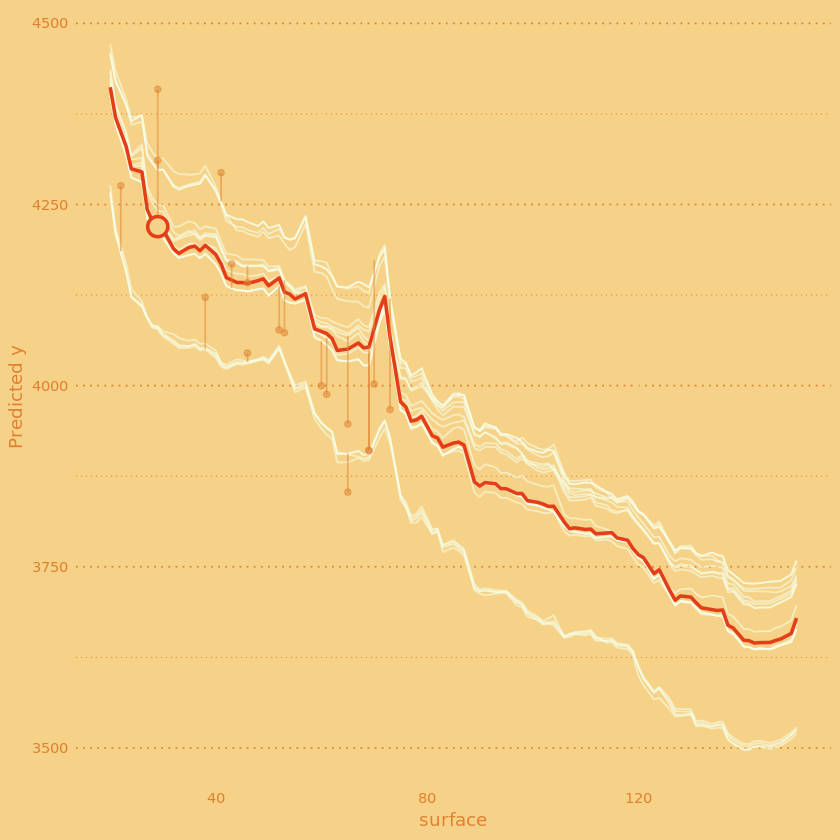

In [14]:
plot(cr_rf, palette = "wangkardu")

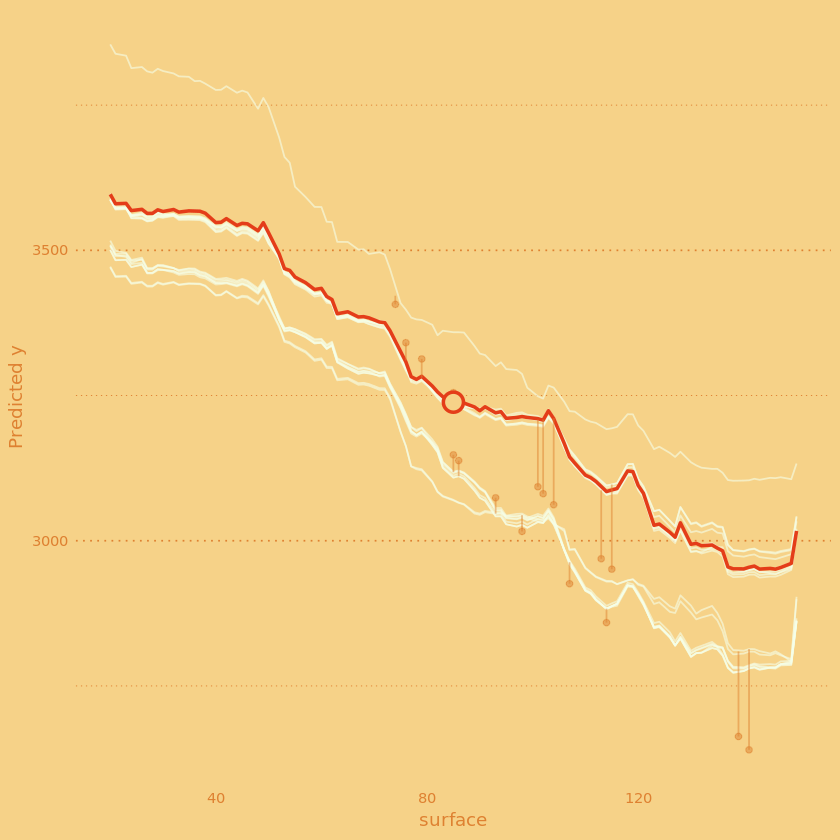

In [15]:
new_apartment <- apartmentsTest[302, ]
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf, palette = "wangkardu")

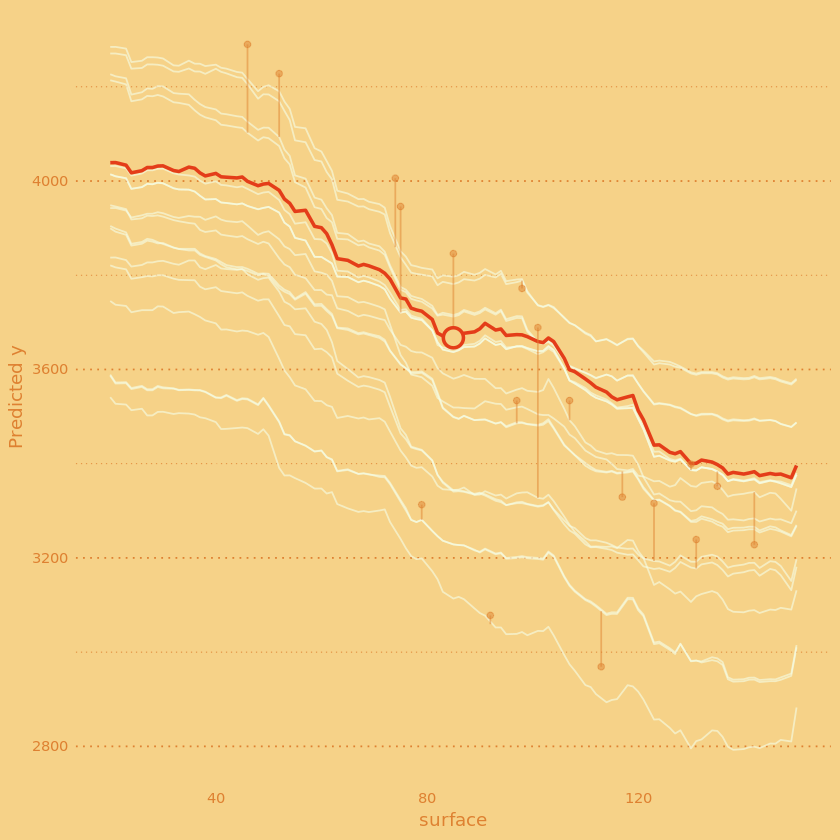

In [16]:
new_apartment <- apartmentsTest[720, ]
cr_rf <- local_fit(explainer_rf, observation = new_apartment, 
                   select_points = 0.002, selected_variable = "surface")
plot(cr_rf, palette = "wangkardu")